<a href="https://colab.research.google.com/github/Bimal2002/AIML_LAB/blob/master/NQueenANDKnightMove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def isSafe(board, row, col, n):
    # row on the left side
    for i in range(col):
        if board[row][i] == 1:
            return False
    # upper diagonal
    i, j = row, col
    while i >= 0 and j >= 0:
        if board[i][j] == 1:
            return False
        i -= 1
        j -= 1
    #lower diagonal
    i, j = row, col
    while i < n and j >= 0:
        if board[i][j] == 1:
            return False
        i += 1
        j -= 1
    return True

def N_Queen_helper(board, col, n, solutions):
    for i in range(n):
        if isSafe(board, i, col, n):
            board[i][col] = 1
            if col == n - 1:
                solutions.append(np.copy(board))
            else:
                N_Queen_helper(board, col + 1, n, solutions)
            # Backtrack (Remove the queen)
            board[i][col] = 0

def N_Queen(n):
    board = [[0] * n for i in range(n)]
    solutions = []
    N_Queen_helper(board, 0, n, solutions)

    print(f"Found {len(solutions)} solutions.")

    for idx, solution in enumerate(solutions):
        print(f"Solution {idx + 1}:")
        print(solution)

        plt.figure(figsize=(5,5))
        plt.imshow(solution, cmap='binary')
        plt.title(f'Solution {idx + 1}')
        plt.axis('off')
        plt.show()

N_Queen(8)


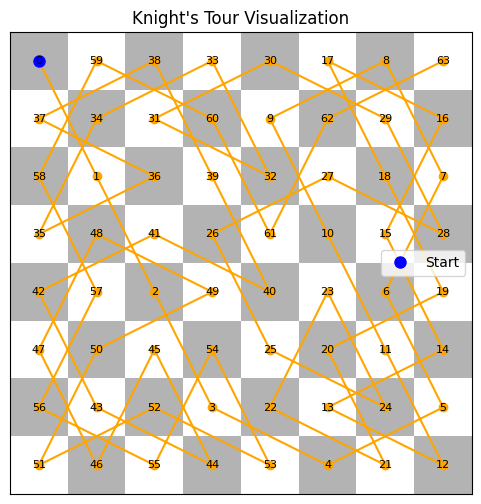

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 8  # Board size

# Knight's possible moves
moves = [
    (2, 1), (1, 2), (-1, 2), (-2, 1),
    (-2, -1), (-1, -2), (1, -2), (2, -1)
]

def is_safe(x, y, board):
    return 0 <= x < N and 0 <= y < N and board[x][y] == -1

def solve_knight_tour():
    board = [[-1] * N for _ in range(N)]
    board[0][0] = 0  # Start at (0,0)

    if knight_tour_util(0, 0, 1, board):
        visualize_knight_tour(board)
    else:
        print("No solution found")

def knight_tour_util(x, y, move_count, board):
    if move_count == N * N:
        return True

    for dx, dy in moves:
        next_x, next_y = x + dx, y + dy
        if is_safe(next_x, next_y, board):
            board[next_x][next_y] = move_count
            if knight_tour_util(next_x, next_y, move_count + 1, board):
                return True
            board[next_x][next_y] = -1  # Backtrack

    return False

def visualize_knight_tour(board):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Create chessboard background
    chessboard = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            chessboard[i, j] = (i + j) % 2

    ax.imshow(chessboard, cmap="gray", alpha=0.3)

    # Get knight tour path
    path = [(x, y) for x in range(N) for y in range(N)]
    path.sort(key=lambda p: board[p[0]][p[1]])  # Sort by move order

    # Draw the path
    x_coords, y_coords = zip(*path)
    ax.plot(y_coords, x_coords, "o-", color="orange", markersize=6)

    # Highlight start position
    ax.plot(y_coords[0], x_coords[0], "bo", markersize=8, label="Start")

    # Label moves
    for i, (x, y) in enumerate(path):
        ax.text(y, x, str(i), ha="center", va="center", fontsize=8, color="black")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Knight's Tour Visualization")
    ax.legend()
    plt.show()

solve_knight_tour()
